In [23]:
import numpy as np
import matplotlib.pyplot as plt

import SSN_classes

# Reduced 2D SSN vs Homog Ring SSN
all parameters below are those used in Fig 1 and Fig2A of Ahmadian et al. 2013 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4026108/)

### 1. Homog Ring SSN

      converged to fixed point at iter=418,      as max(abs(dx./max(xvec,1.0))) < 1e-05 
(420, 2)


0.0

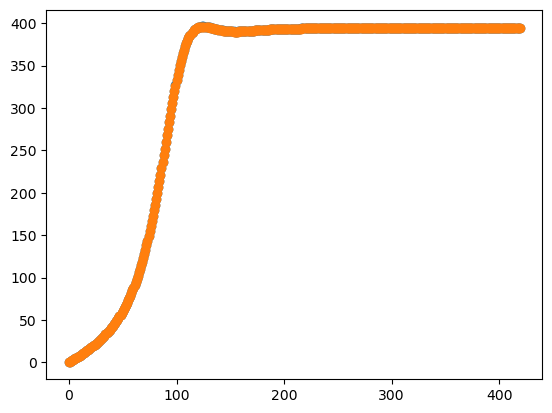

In [45]:
M = 600  # number of neurons in E or I populations (2013 paper had M = 180, but lower (but not too much low) is also fine, and wouldn't really affect anything)
L = 180  # length of the ring (180 degrees)

J_2x2 = np.array([[2.5, -1.3],
                  [2.4, -1.0]]) * np.pi 
s_2x2 = np.ones((2,2)) * 32 # in degrees, orientation tuning width of recurrent connections

# make SSN object
ssn = SSN_classes.SSNHomogRing(n=2, k=0.04, tauE=20, tauI=10, 
                               J_2x2=J_2x2, s_2x2=s_2x2, Ne=M, L=L)

# make external input vector corresponding to a grating stimulus
contrast = 20
orientation = 0
input = ssn.make_grating_input(ori_s=orientation,
                                sig_EF=30,  # in degrees, orientation tuning width of external input 
                                gE=1,
                                gI=0,
                                contrast=contrast)

# find fixed point firing rates
rates, convg = ssn.fixed_point_r(input, Tmax = 500, verbose=True, PLOT=True)

# print(ssn.maps)
# plt.plot(ssn.ori_vec_E)
# plt.plot(input)

M / L * orientation

# To check signs of weight matrix
# plt.imshow(ssn.W, cmap='viridis', interpolation='nearest')
# plt.colorbar()



 Warning 1: reached Tmax=500, before convergence to fixed point.
       max(abs(dx./max(abs(xvec), 1.0))) = nan,   xtol=1e-05.

(501, 2)
Did not reach fixed point.
[nan nan]


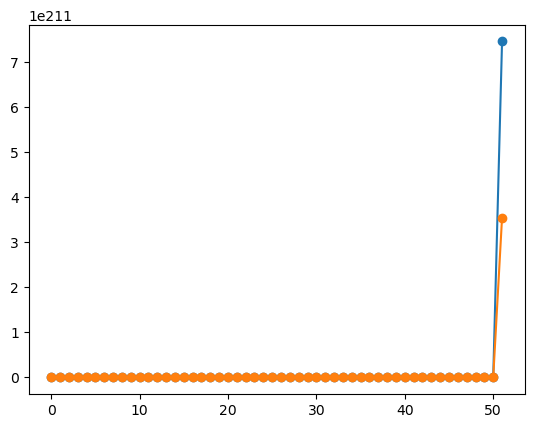

In [21]:
Phi = 1.024
ssn_2d = ssn = SSN_classes.SSN_2D(n=2, k=0.04, tauE=20, tauI=10, Jee = 2.5 *Phi , Jei = 2.4*Phi, Jie=-1.3*Phi, Jii=-1.0*Phi)

input = np.array([1,0]) * 6


# find fixed point firing rates
rates, convg = ssn_2d.fixed_point_r(input, Tmax = 500, verbose=True, PLOT=True)
print(rates)
# plt.plot(rates)
# plt.yscale('log')  # Set x-axis to logarithmic scale

# To check signs of weight matrix
# plt.imshow(ssn_2d.W, cmap='viridis', interpolation='nearest')
# plt.colorbar()


# Ring SSN of Ahmadian, Rubin and Miller, Neural Computation, 2013.
all parameters below are those used in Fig 1 and Fig2A of Ahmadian et al. 2013 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4026108/)

      converged to fixed point at iter=3542,      as max(abs(dx./max(xvec,1.0))) < 1e-05 
(3544, 2)


200.0

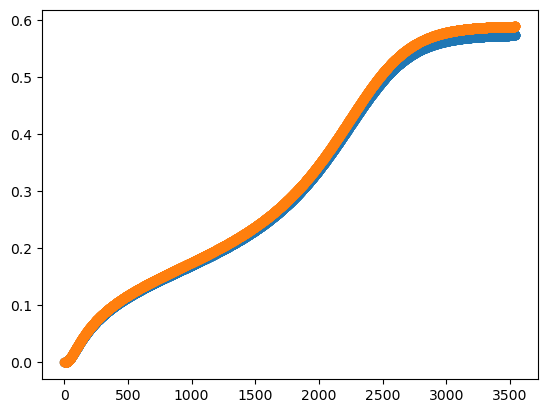

In [7]:
M = 600  # number of neurons in E or I populations (2013 paper had M = 180, but lower (but not too much low) is also fine, and wouldn't really affect anything)
L = 180  # length of the ring (180 degrees)

J_2x2 = np.array([[2.5, -1.3],
                  [2.4, -1.0]]) * np.pi 
s_2x2 = np.ones((2,2)) * 32 # in degrees, orientation tuning width of recurrent connections

# make SSN object
ssn = SSN_classes.SSNHomogRing(n=2, k=0.04, tauE=20, tauI=10, 
                               J_2x2=J_2x2, s_2x2=s_2x2, Ne=M, L=L)

# make external input vector corresponding to a grating stimulus
contrast = 8
orientation = 60
input = contrast * ssn.make_grating_input(ori_s=orientation,
                                          sig_EF=3,  # in degrees, orientation tuning width of external input 
                                          gE=2,
                                          gI=0)

# find fixed point firing rates
rates, convg = ssn.fixed_point_r(input, Tmax = 5000, verbose=True, PLOT=True)

# print(ssn.maps)
# plt.plot(ssn.ori_vec_E)
# plt.plot(input)

M / L * orientation

# To check signs of weight matrix
# plt.imshow(ssn.W, cmap='viridis', interpolation='nearest')
# plt.colorbar()


# Retinotopic-map SSN of Holt, Miller, and Ahmadian, 2023
https://www.biorxiv.org/content/10.1101/2023.05.11.540442v1.abstract

This is (almost) the SSN in Fig. 4 of the above paper.
(Note, however, here I construct the single-synaptic-receptor-type SSN; to get the version of the model in the paper you have to use `SSN_classes.SSN2DTopoV1_AMPAGABA` and specify other parameters, including `ssn.tau_s`.)

In [8]:
from dataclasses import dataclass

@dataclass
class GridPars:
    gridsize_Nx: int # number of grid-points across each edge of the 2D retinotopic grid
    gridsize_deg: float # edge length in degrees of visual angle
    magnif_factor: float # cortical magnification factor in mm/deg
    hyper_col: float # hypercolumn size (i.e. period of orientation map) in mm 

(203, 2)


-0.0

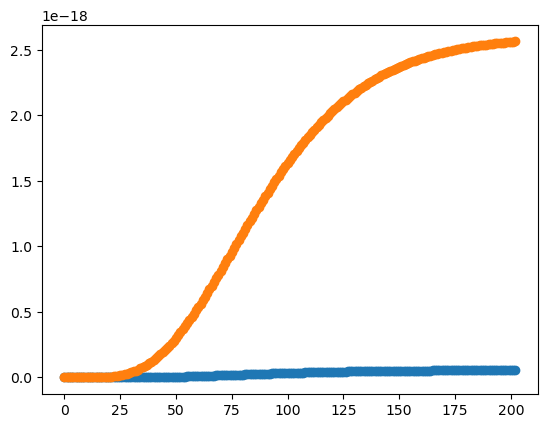

In [13]:
grid_pars = GridPars(**{'gridsize_Nx': 17,
                        'gridsize_deg': 3.2,
                        'hyper_col': 800,   # if you actually want to get an orientation map, a reasonable choice would be 0.8 to 1.0 mm
                        'magnif_factor': 2})

psi = 0.774
conn_pars = dict(J_2x2= np.array([[1.495, -1.034],
                                  [1.110, -0.517]]) * np.pi * psi,
                 s_2x2= np.array([[0.2654, 0.09],
                                  [0.2940, 0.09]]), # in mm
                 p_local= [0., 0.],
                 sigma_oris= 45,
                 PERIODIC= False,
                 CellWiseNormalized=True)

# make SSN object
ssn = SSN_classes.SSN2DTopoV1(n=2,
                              k=0.04,
                              tauE=20,
                              tauI=10, 
                              grid_pars=grid_pars,
                              conn_pars=conn_pars)

# make feedforward input vector for a grating stimulus
contrasts = 50
radius = 0.75
orientation = 0


input_pars = {'gE' : 0.476,
              'gI' : 0.232,
             'sig_ori_EF': 32,
             'sig_ori_IF': 32,
             'sigma_RF': 0.04}
             

input = contrast * ssn.make_grating_input(radius, ori_s=orientation,
                                          **input_pars)

# find fixed point firing rates
rates, convg = ssn.fixed_point_r(input, verbose=False, PLOT=True)

# plt.imshow(ssn.W, cmap='viridis', interpolation='nearest')
# plt.colorbar()

ssn.W[200,300]

For Fig. 6 of the above paper, replace the following according to:

In [10]:
conn_pars = dict(J_2x2= np.array([[1.495, -1.034],
                                  [1.110, -0.517]]) * np.pi * psi,
                 s_2x2= np.array([[0.2654, 0.09],
                                  [0.2940, 0.09]]), # in mm
                 p_local= [0., 0.],
                 sigma_oris= 45,
                 PERIODIC= False,
                 CellWiseNormalized=True)

input_pars = {'gE' : 0.476,
              'gI' : 0.232,
             'sig_ori_EF': 32,
             'sig_ori_IF': 32,
             'sigma_RF': 0.04}